In [ ]:
! pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.4.1)


In [2]:
import tensorflow as tf

tf.__version__

mnist = tf.keras.datasets.mnist # import handwritting dataset 28x28 sized images of handwritten digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data() # unpacks dataset

# normalize x_train and x_test (make them between 0 and 1)
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


#Build the model
model = tf.keras.models.Sequential() # most common tye of model (feed-forward)
model.add(tf.keras.layers.Flatten()) #add input layer to flatten images
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer 1: 128 units(neurons) in the layer with the rectifed linear activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer 2:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # hidden layer 3: output layer with 10 classifications using softmax becuase its a probability dist

# parameters for training the model
model.compile(optimizer='adam', # adam is the most common optimizer
              loss='sparse_categorical_crossentropy', # loss is degree of error (what the network got wrong)
              metrics=['accuracy'])



# train the model
model.fit(x_train, y_train, epochs=3)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4743 - accuracy: 0.8624
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1100 - accuracy: 0.9656
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9774


In [3]:
# check how good the model is
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc) # loss: 0.0857 - accuracy: 0.9716 which is pretty good 

313/313 [==============================] - 1s 1ms/step - loss: 0.0894 - accuracy: 0.9714
0.08937086164951324 0.9714000225067139


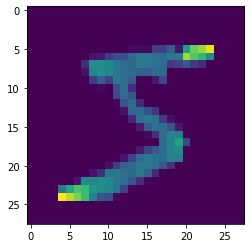

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
#plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train) # prints tensor


INFO:tensorflow:Assets written to: handwritting-model/assets
7


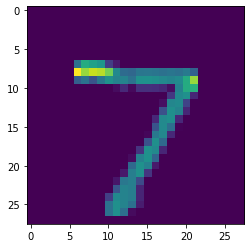

2


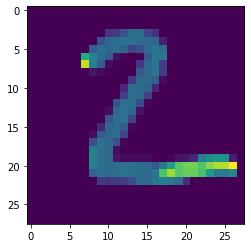

1


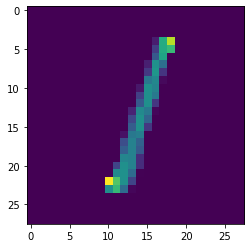

0


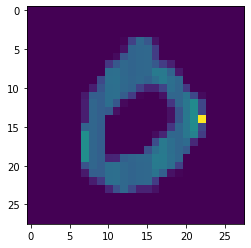

4


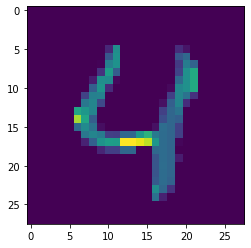

1


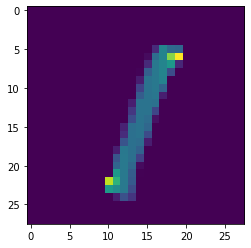

4


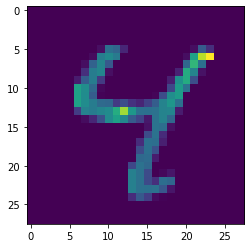

9


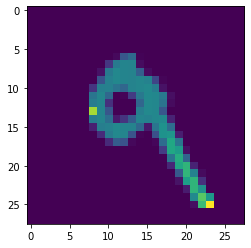

5


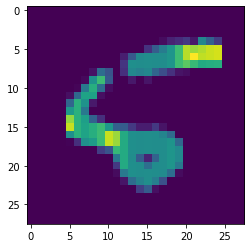

9


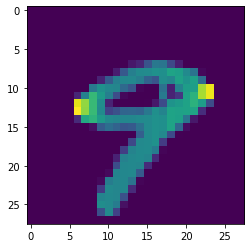

0


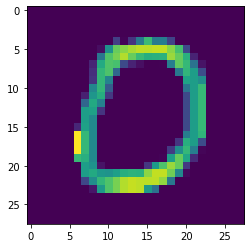

6


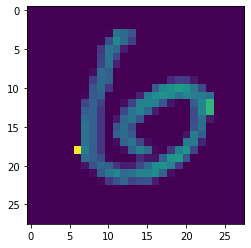

9


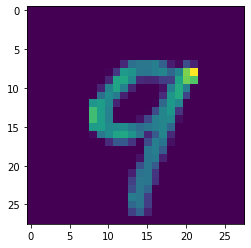

0


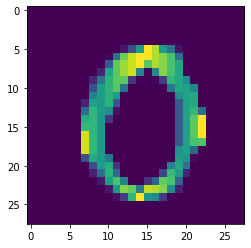

1


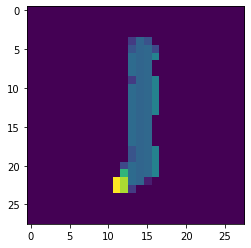

5


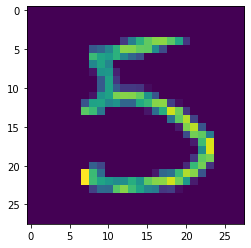

9


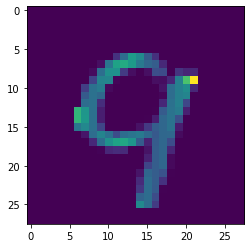

7


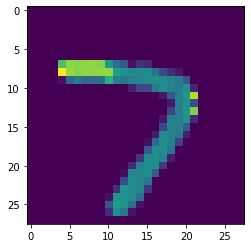

3


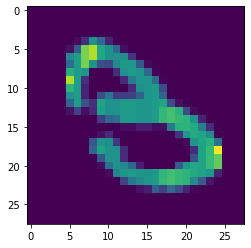

4


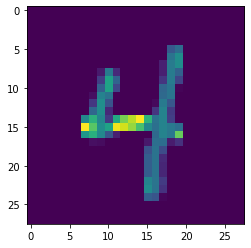

9


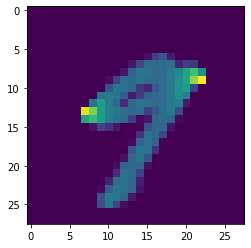

'\nfor x in np.nditer(predictions):\n  #print(type(predictions))\n  print(np.argmax(predictions[x])) # print the zero-th prediction of x_test\n  plt.imshow(x_test[x])\n  plt.show()\n'

In [8]:
# save model
model.save("handwritting-model")
# load model
new_model = tf.keras.models.load_model('handwritting-model')
# predict
predictions = new_model.predict([x_test]) # returns as a probibilty dist


import numpy as np
for i in range(21): #10000 total
  print(np.argmax(predictions[i])) # print the i-th prediction of x_test
  plt.imshow(x_test[i])
  plt.show()

'''
for x in np.nditer(predictions):
  #print(type(predictions))
  print(np.argmax(predictions[x])) # print the zero-th prediction of x_test
  plt.imshow(x_test[x])
  plt.show()
'''